In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pima_data=pd.read_csv("D:\my_career\data_science\pima-indians-diabetes-database\diabetes.csv")

In [4]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df=pima_data

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

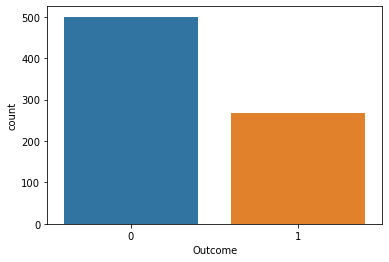

In [8]:
sns.countplot(x="Outcome",data=df)

In [9]:
x=df.iloc[:,:-1]

In [10]:
y=df.iloc[:,-1]

In [11]:
x=np.c_[np.ones((x.shape[0], 1)), x]

In [12]:
y = y[:, np.newaxis]

In [13]:
def sigmoid(x, w):
    z= np.dot(x, w)
    #print(z)
    return 1/(1+np.exp(-z))

In [47]:
def cost_function(w,x, y):
    m = x.shape[0]
    dw=np.zeros((x.shape[1], 1))
    #h = sigmoid(x,w)
   
    for i in range(m):
        h = sigmoid(x,w)
        j=-(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
        dw+=(1/m) * np.dot(x.T, (h-y))
        w=w - (0.0001 * (dw))
    
    return w,j
        

In [54]:
def gradient(w, x, y):
    c=[]
    for i in range(1000):
        w,j=cost_function(w,x,y)
        if i<100:
            c.append(j)
    #print(h)
    return w,c

In [55]:
theta = np.zeros((x.shape[1], 1))
theta.shape

(9, 1)

In [56]:
a,c=gradient(theta,x,y)

In [57]:
a

array([[-8.40469637e+00],
       [ 1.23182299e-01],
       [ 3.51637197e-02],
       [-1.32955408e-02],
       [ 6.18975165e-04],
       [-1.19169951e-03],
       [ 8.97009297e-02],
       [ 9.45179740e-01],
       [ 1.48690062e-02]])

In [24]:
b=sigmoid(x,a)

In [25]:
z=[]

In [26]:
for i in b:
    if i>=0.5:
        z.append(1)
    
    else:
        z.append(0)

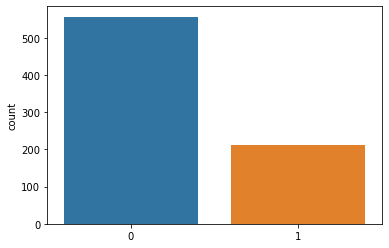

In [27]:
sns.countplot(z)

In [28]:
z.count(1)

211

In [29]:
accuracy = 0
for i in range(0, len(z)):
    if z[i] == y[i]:
        accuracy += 1
accuracy/len(y)

0.7825520833333334

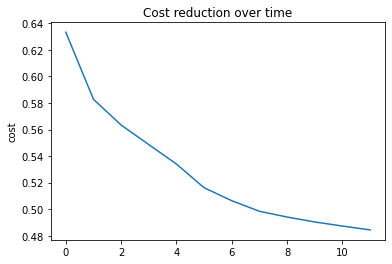

In [66]:
plt.plot(c[:12])
plt.ylabel('cost')

plt.title('Cost reduction over time')
plt.show()